## RCDS Optimization

In this example we demonstrate RCDS optimization.

In [1]:
# If you encounter the "Initializing libomp.dylib, but found libomp.dylib already initialized." error
# Please run this cell

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import time
import numpy as np
from xopt.generators.rcds.rcds import RCDSGenerator
from xopt.vocs import VOCS
from xopt.evaluator import Evaluator
from xopt import Xopt
import pandas as pd
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings("ignore")

### RCDS test problem

This test problem is a 2-D quadratic function.

In [3]:
def f_RCDS_minimize(input_dict):
    p = []
    for i in range(2):
        p.append(input_dict[f'p{i}'])
    
    obj = np.linalg.norm(p)
    outcome_dict = {'f': obj}
    
    return outcome_dict

### Run RCDS on the test problem (YAML method)

In [4]:
YAML = """
xopt:
    max_evaluations: 1000
generator:
    name: rcds
    x0: null
    init_mat: null
    noise: 0.00001
    step: 0.01
    tol: 0.00001
    max_it: 50
evaluator:
    function: __main__.f_RCDS_minimize
vocs:
    variables:
        p0: [0, 1]
        p1: [0, 1]
    objectives:
        f: MINIMIZE
"""

X = Xopt(YAML)
X


            Xopt
________________________________
Version: 1.2.6+13.gf14dfea
Data size: 0
Config as YAML:
xopt: {asynch: false, strict: false, dump_file: null, max_evaluations: 1000}
generator: {name: rcds, x0: null, init_mat: null, noise: 1.0e-05, step: 0.01, tol: 1.0e-05,
  max_it: 50}
evaluator:
  function: __main__.f_RCDS_minimize
  max_workers: 1
  function_kwargs: {}
  vectorized: false
vocs:
  variables:
    p0: [0.0, 1.0]
    p1: [0.0, 1.0]
  constraints: {}
  objectives: {f: MINIMIZE}
  constants: {}
  linked_variables: {}


In [5]:
X.run()

StopIteration: (matrix([[5.22141485e-05],
        [2.05221415e-03]]), 0.002052878279089894, 779)

Now you can go directly to the [Visualization](#Visualization) section and check out the results.

### Run RCDS on the test problem (API method)

#### VOCS

We'll set the bounds for all the variables pi to [0, 1].

In [7]:
n_var = 2

In [8]:
variables = {}
for i in range(n_var):
    variables[f'p{i}'] = [0, 1]

vocs = VOCS(
    variables=variables,
    objectives={'f': 'MINIMIZE'},
)

In [9]:
vocs

VOCS(variables={'p0': [0.0, 1.0], 'p1': [0.0, 1.0]}, constraints={}, objectives={'f': 'MINIMIZE'}, constants={}, linked_variables={})

#### Evaluator

In [10]:
evaluator = Evaluator(function=f_RCDS_minimize)

#### Generator

In [11]:
options = RCDSGenerator.default_options()

In [12]:
options.dict()

{'x0': None,
 'init_mat': None,
 'noise': 1e-05,
 'step': 0.01,
 'tol': 1e-05,
 'max_it': 10}

We'll increase the maximum iteration number to 50 to allow convergence:

In [13]:
options.max_it = 50

In [14]:
options.dict()

{'x0': None,
 'init_mat': None,
 'noise': 1e-05,
 'step': 0.01,
 'tol': 1e-05,
 'max_it': 50}

In [15]:
generator = RCDSGenerator(vocs, options)

#### Run the optimization

In [16]:
max_eval = 1000

In [17]:
X = Xopt(vocs=vocs, evaluator=evaluator, generator=generator)

In [18]:
X.options.max_evaluations = max_eval

In [19]:
for i in tqdm(range(max_eval)):
    X.step()

  0%|          | 0/1000 [00:00<?, ?it/s]

StopIteration: (matrix([[5.22141485e-05],
        [2.05221415e-03]]), 0.002052878279089894, 779)

### Visualization

<AxesSubplot: >

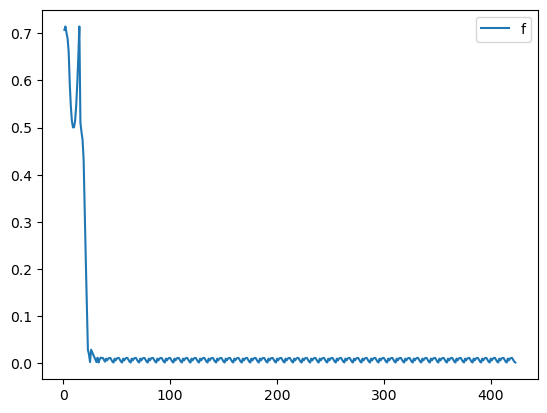

In [20]:
X.data.plot(y='f')